In [3]:
# STEP 1: IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#STEP 2: IMPORT AND PREPROCESSING DATA
df = pd.read_csv("C:\\Users\\Akande\\Desktop\\Codes\\covid 19 data\\covid_19_clean_complete.csv")

#check the first 5 rows of the data
print(df.head())
print(df.columns)

#describe the data
print(df.describe())



  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  1/22/2020          0   
1            NaN        Albania  41.15330  20.168300  1/22/2020          0   
2            NaN        Algeria  28.03390   1.659600  1/22/2020          0   
3            NaN        Andorra  42.50630   1.521800  1/22/2020          0   
4            NaN         Angola -11.20270  17.873900  1/22/2020          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
                Lat          Long     Confirmed    

In [5]:
#STEP 3: HANDLING MISSING VALUES
#check for missing value
print(df.isnull().sum())

df['Province/State'].fillna('Unknown', inplace=True)
# Active Case = confirmed - deaths - recovered
df['Active'] = df['Confirmed'] - df[ 'Deaths'] - df['Recovered']

#Transform date column to datetime format

from datetime import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.normalize()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

a = df.Date.value_counts().sort_index()
print(f"the first date is: {a.index[0]}")
print(f"the last date is: {a.index[-1]}")

total_cases = df.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


C:\Users\Akande\AppData\Local\Temp\ipykernel_6992\794613912.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province/State'].fillna('Unknown', inplace=True)


the first date is: 2020-01-22
the last date is: 2020-07-27


,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [6]:
#Step 4: FEARTURE ENGINEERING

#load a new dataset with the new features
df_1=pd.read_csv("C:\\Users\\Akande\\Desktop\\Codes\\covid 19 data\\worldometer_data.csv")

# Find the common columns
common_columns = set(df) & set(df_1)

# Print the common columns
print("Common columns:")
for column in common_columns:
    print(column)
    
# Check if the values in the common columns are the same
for column in common_columns:
    if df[column].equals(df_1[column]):
        print(f"The values in the '{column}' column are the same in both datasets.")
    else:
        print(f"The values in the '{column}' column are different in the two datasets.")


# Check for inconsistencies in country names between the two datasets
inconsistent_countries = set(df['Country/Region']) ^ set(df_1['Country/Region'])
print(inconsistent_countries)

# Merge the datasets
merged_df = pd.merge(df, df_1, on='Country/Region', how='outer', suffixes=('_x', '_y'))

# Print the merged dataset
print(merged_df.head())
print(merged_df.columns)
print(merged_df.shape)


# Calculate daily growth rates
merged_df['daily_growth_rate_cases'] = merged_df.groupby('Country/Region')['Confirmed'].pct_change()
merged_df['daily_growth_rate_deaths'] = merged_df.groupby('Country/Region')['Deaths'].pct_change()

# Calculate mortality ratios
merged_df['mortality_ratio'] = merged_df['Deaths'] / merged_df['Confirmed']

# Calculate cases per Population (assuming 'Population' column exists)
merged_df['cases_per_population'] = merged_df['Confirmed'] / merged_df['Population'] * 100000

# Calculate deaths per Population (assuming 'Population' column exists)
merged_df['deaths_per_population'] = merged_df['Deaths'] / merged_df['Population'] * 100000

# Calculate recovery rate
merged_df['recovery_rate'] = merged_df['Recovered'] / merged_df['Confirmed']

# Calculate active case rate
merged_df['active_case_rate'] = merged_df['Active'] / merged_df['Confirmed']



Common columns:
WHO Region
Country/Region
The values in the 'WHO Region' column are different in the two datasets.
The values in the 'Country/Region' column are different in the two datasets.
{'UK', 'Brunei', 'Holy See', 'Cayman Islands', 'French Guiana', 'Turks and Caicos', 'Myanmar', 'Congo', 'New Caledonia', 'China', 'Hong Kong', 'Guadeloupe', 'Aruba', 'St. Vincent Grenadines', 'Martinique', 'Saint Martin', 'Réunion', 'S. Korea', 'Gibraltar', 'Caribbean Netherlands', 'Central African Republic', 'Macao', 'UAE', 'United Kingdom', 'Isle of Man', 'USA', 'West Bank and Gaza', 'Falkland Islands', 'Palestine', 'Taiwan', 'Brunei ', 'Vatican City', 'Diamond Princess', 'French Polynesia', 'Montserrat', 'US', 'Curaçao', 'Congo (Kinshasa)', 'Sint Maarten', 'Burma', 'United Arab Emirates', 'CAR', 'Kosovo', 'Channel Islands', 'Taiwan*', 'Mayotte', 'Ivory Coast', 'Bermuda', 'Saint Vincent and the Grenadines', 'DRC', 'South Korea', "Cote d'Ivoire", 'Faeroe Islands', 'Congo (Brazzaville)'}


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0        Unknown    Afghanistan  33.93911  67.709953  2020-01-22        0.0   
1        Unknown    Afghanistan  33.93911  67.709953  2020-01-23        0.0   
2        Unknown    Afghanistan  33.93911  67.709953  2020-01-24        0.0   
3        Unknown    Afghanistan  33.93911  67.709953  2020-01-25        0.0   
4        Unknown    Afghanistan  33.93911  67.709953  2020-01-26        0.0   

   Deaths  Recovered  Active           WHO Region_x  ... NewDeaths  \
0     0.0        0.0     0.0  Eastern Mediterranean  ...       NaN   
1     0.0        0.0     0.0  Eastern Mediterranean  ...       NaN   
2     0.0        0.0     0.0  Eastern Mediterranean  ...       NaN   
3     0.0        0.0     0.0  Eastern Mediterranean  ...       NaN   
4     0.0        0.0     0.0  Eastern Mediterranean  ...       NaN   

   TotalRecovered  NewRecovered  ActiveCases  Serious,Critical  \
0         25840.0           NaN       

C:\Users\Akande\AppData\Local\Temp\ipykernel_6992\25502485.py:36: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_df['daily_growth_rate_cases'] = merged_df.groupby('Country/Region')['Confirmed'].pct_change()
C:\Users\Akande\AppData\Local\Temp\ipykernel_6992\25502485.py:37: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_df['daily_growth_rate_deaths'] = merged_df.groupby('Country/Region')['Deaths'].pct_change()


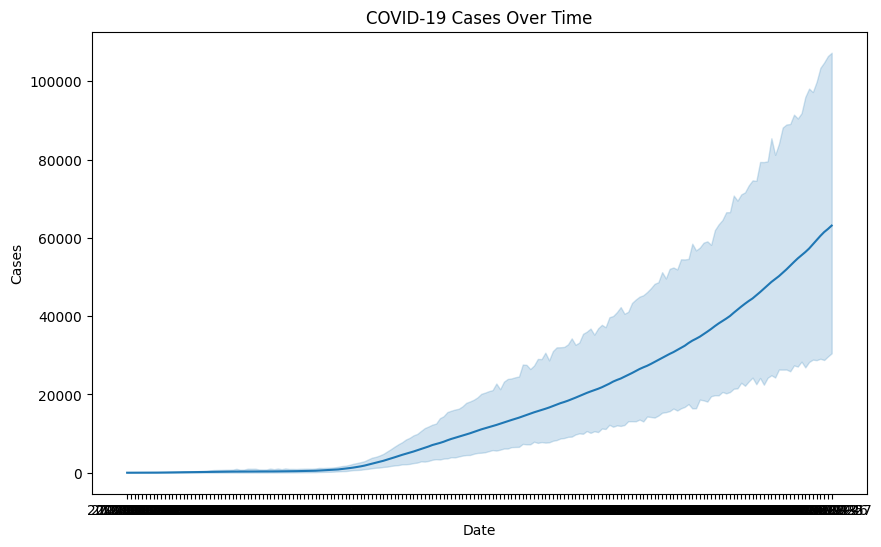

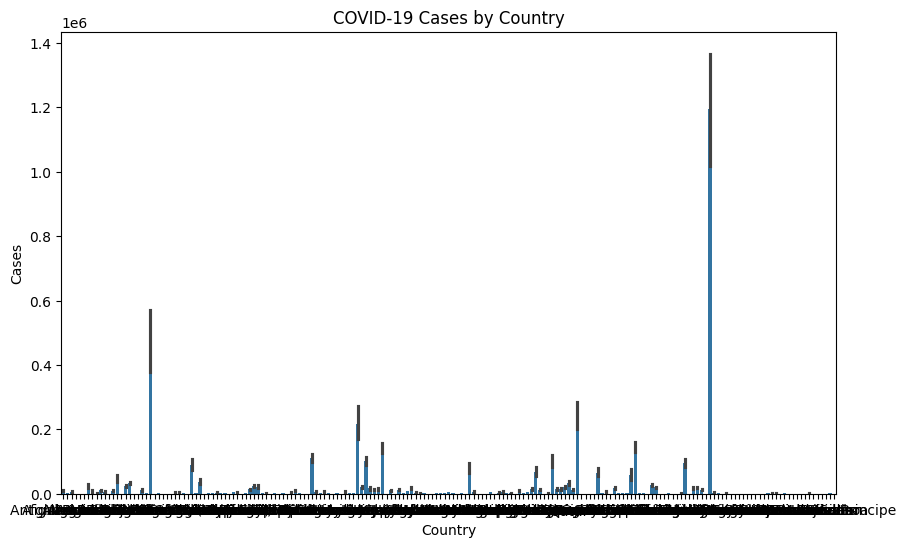

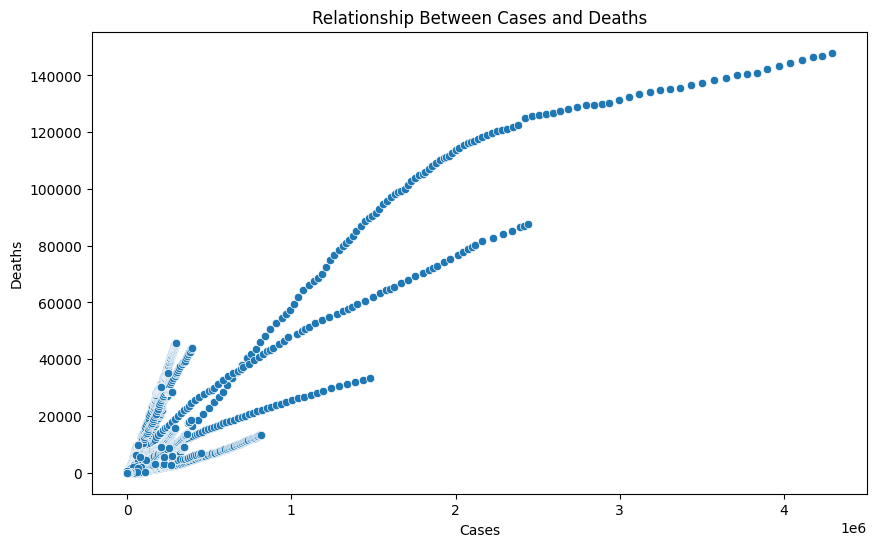

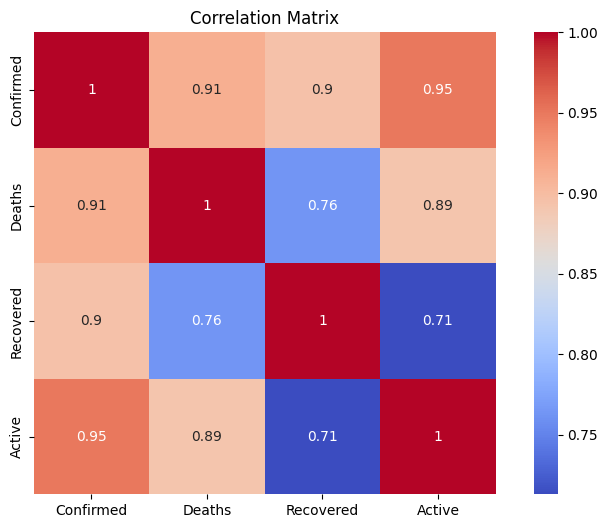

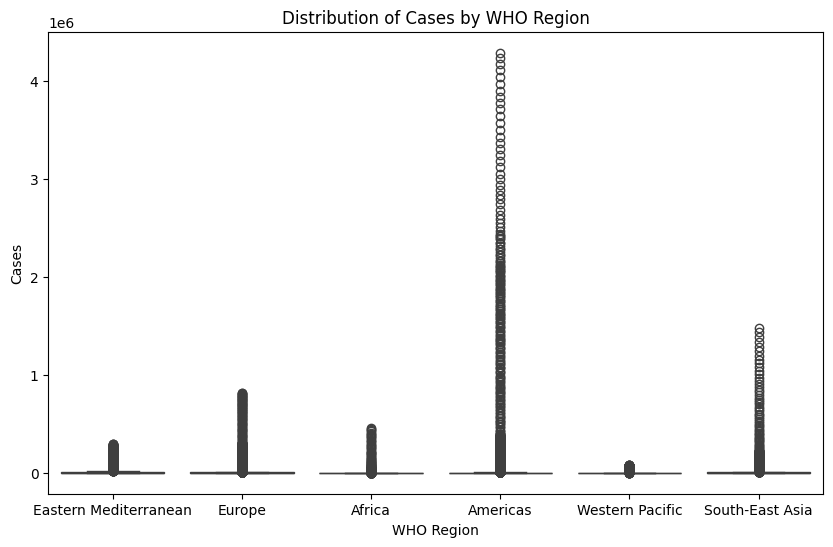

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64
Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64


C:\Users\Akande\AppData\Local\Temp\ipykernel_6992\3673510782.py:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(ncol=2, loc="upper left", frameon=True)


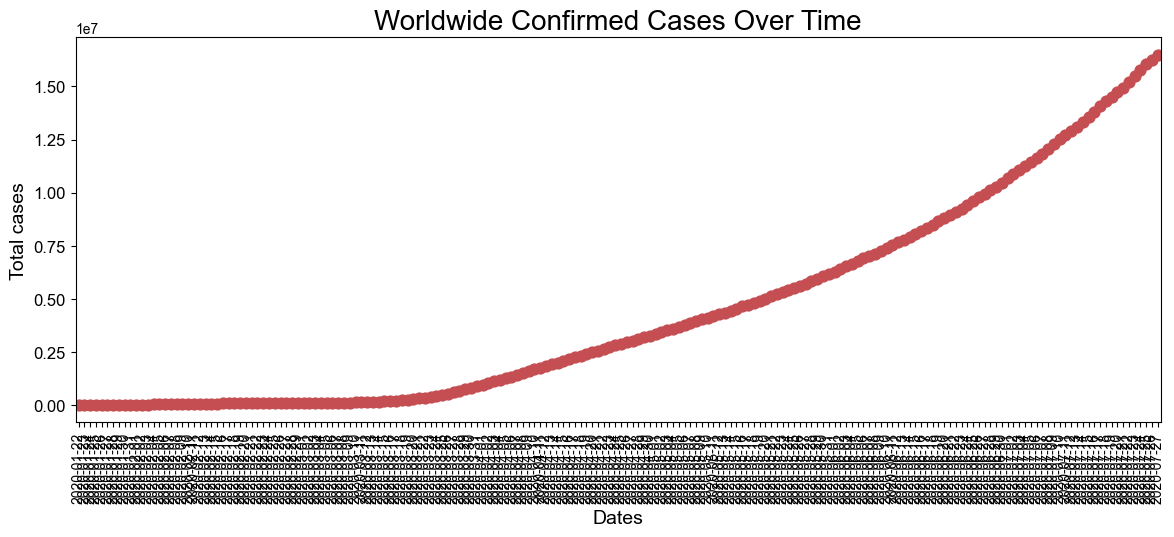

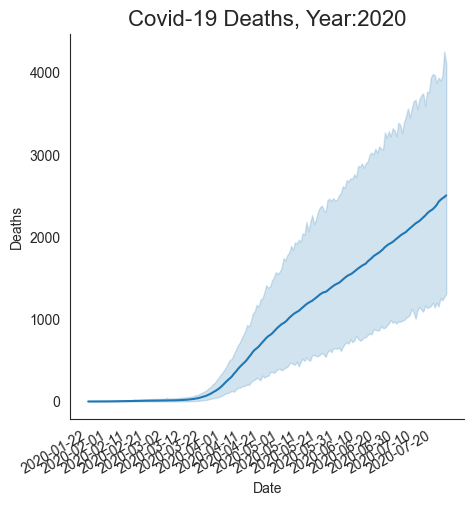

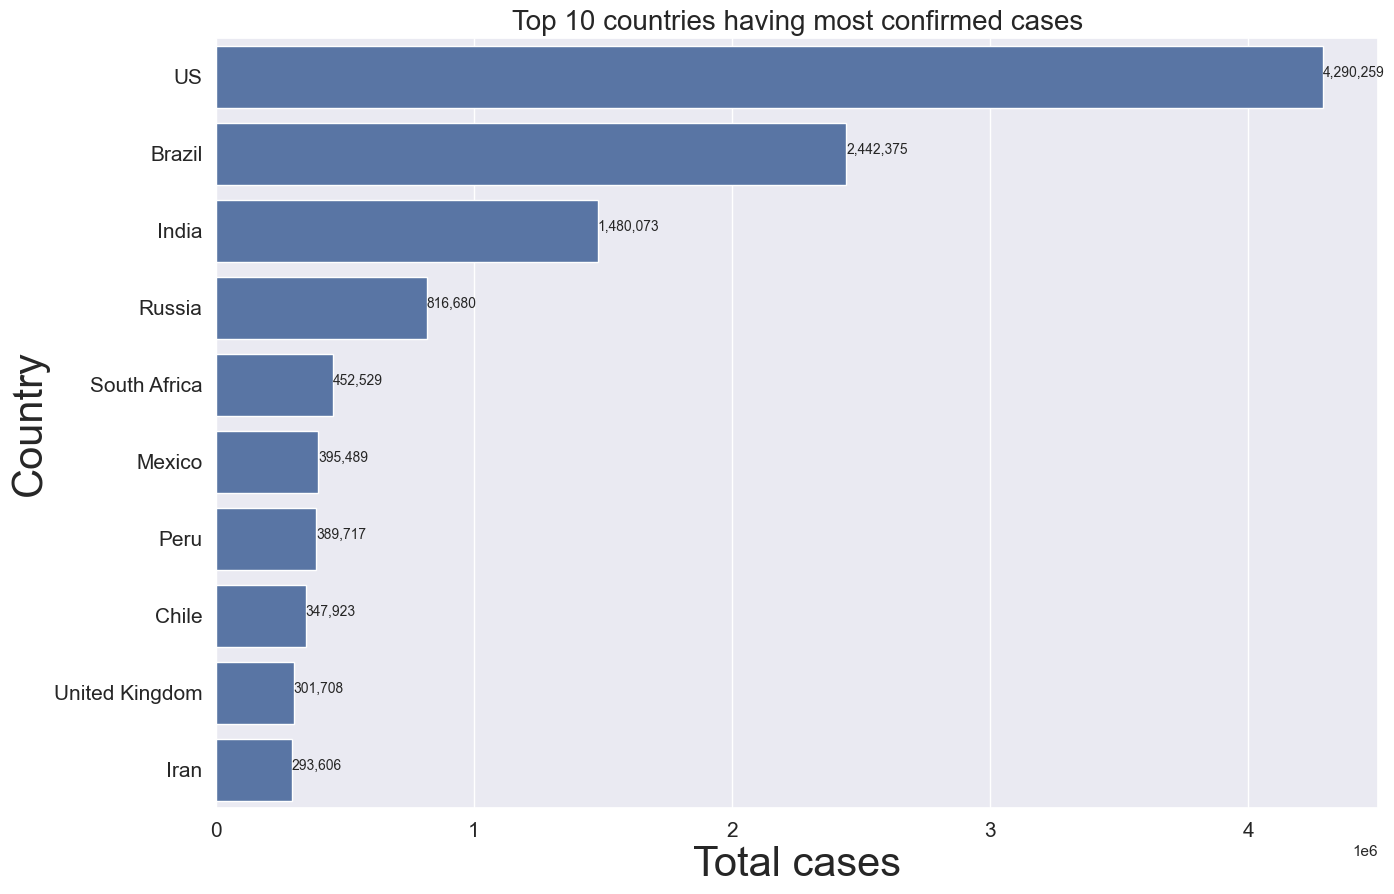

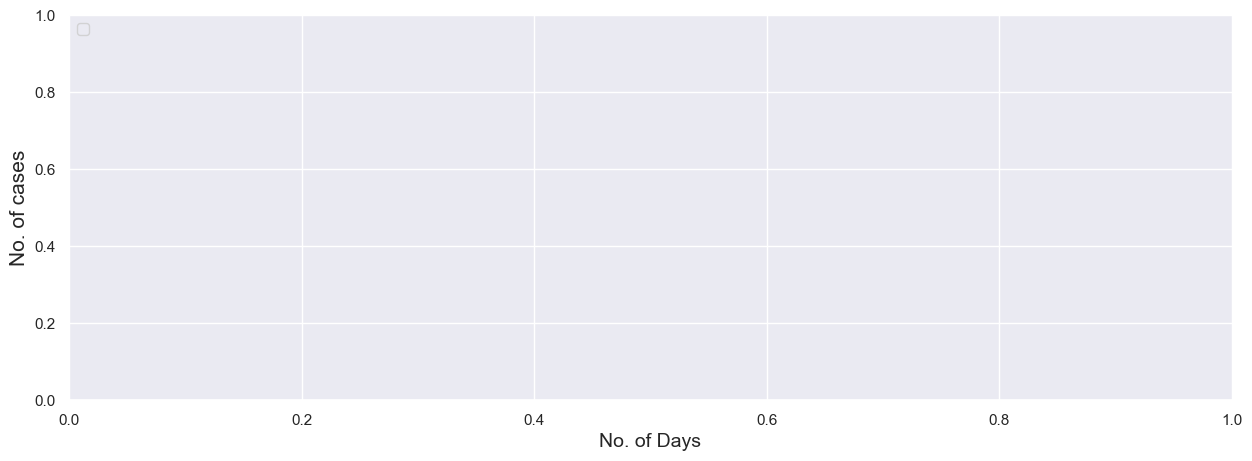

In [7]:
#STEP 5 EXPLORATORY DATA ANALYSIS

# Line plot: COVID-19 cases over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Confirmed', data=df)
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

# Bar chart: COVID-19 cases by country
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Confirmed', data=df)
plt.title('COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

# Scatter plot: Relationship between cases and deaths
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Relationship Between Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

# Heatmap: Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Box plot: Distribution of cases by WHO region
plt.figure(figsize=(10,6))
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Cases')
plt.show()

# Identify top 10 countries with highest number of cases
top_10_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_10_countries)

# Identify top 10 countries with highest number of deaths
top_10_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
print(top_10_deaths)



plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

with sns.axes_style('white'):
    
    g = sns.relplot(
        x="Date", 
        y="Deaths", 
        kind="line", 
        data=df
    )
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title("Covid-19 Deaths, Year:2020", fontsize=16)

    top = df.loc[df['Date'] == df['Date'].max()]
    
    top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()

top_casualities

sns.set(style="darkgrid")
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

plt.xlabel('No. of Days', fontsize=14)
plt.ylabel('No. of cases', fontsize=15)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(top=True)


Mean Squared Error (MSE): 18838245490.75016


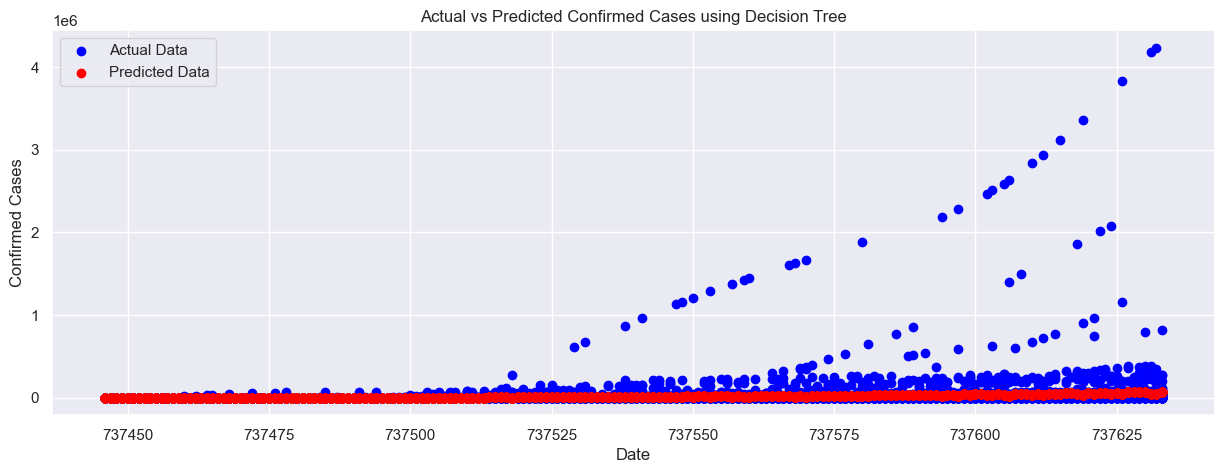

c:\Users\Akande\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Akande\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Akande\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Akande\AppData\Local\Programs\Python\Python312

RMSE: 137939.49674322596
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2435
           1       1.00      1.00      1.00      7379

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814

Confusion Matrix:
[[2435    0]
 [   0 7379]]


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#step 6: Train the model

# Prepare data (convert date to numerical format)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df[['Date']]  # Feature: Date
y = df['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()

# Time-Series Modeling (ARIMA)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
model = ARIMA(train_df['Confirmed'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_df))
mse = mean_squared_error(test_df['Confirmed'], forecast)
print(f'RMSE: {np.sqrt(mse)}')

# Classification Modeling (Random Forest)
X = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]
y = np.where(df['Confirmed'] > df['Recovered'], 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')



Cross-Validation Scores: [0.94883543 0.94208986 0.94259896 0.94654448 0.94501018]
Mean CV Score: 0.9450157823643452
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4906
           1       0.96      0.93      0.94      4916

    accuracy                           0.94      9822
   macro avg       0.94      0.94      0.94      9822
weighted avg       0.94      0.94      0.94      9822

Confusion Matrix:
[[4706  200]
 [ 346 4570]]
RMSE: 0.23577424154252768


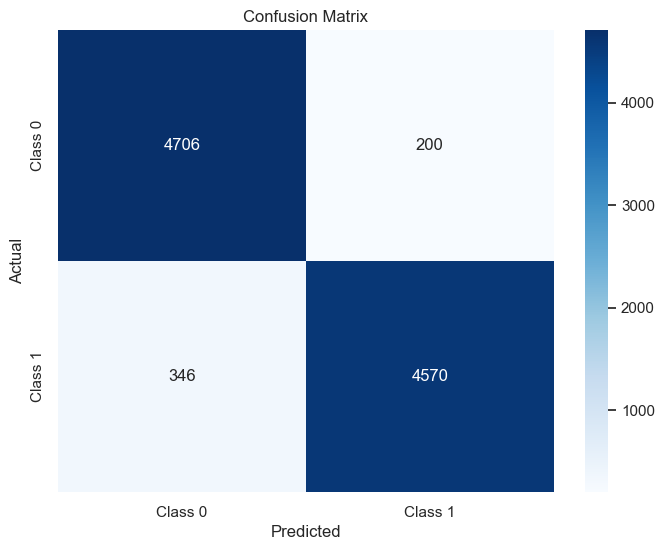

: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target_column', axis=1)  # Replace 'target_column' with your actual target column name
# y = df['target_column']

# For demonstration, let's create a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=49106, n_features=25, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (you can choose any model)
model = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Evaluate the best model from Grid Search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix for Best Model:")
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print(conf_matrix_best)

# Calculate RMSE for the best model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f'RMSE for Best Model: {rmse_best}')